# Text Mining Application
<hr>
This notebook showcases an application in the field of Text Mining and explain how to utilize cosine similarity within this context.

## Text Mining 
With the words $text\; mining$ we refer to all those methods used to extract relevant information from big and usually unstructured collections of textual documents. Another way to refer to text mining is $information \; retrival$. 
For example, if in a given medical database we would like to find all the documents related to a certain syndrome, we can ask a $query$ containing the keywords relevant to identify the chosen content. The research system will do a match between the query and all the documents inserted in the database. Such documents will be "ordered" according to their "connection" to the query. 

The keywords containing information about the content of a given document are called $terms$. The first step consists in creating a list of all the terms, i.e., an $index$ is created. Then for every term, a list of the documents containing that term is stored.

<div>
<img src="index.png" width="400"/>
</div>

Before starting using any technique related to text mining is fundamental to make some preprocessing steps:

1) The so-called "stop words" are removed: conjunctions, articles, adverbs, etc. 

2) Stemming: only the root of every word is kept.

<div>
<img src="stemming.png" width="400"/>
</div>

### Vector space Model

A $term-document$ matrix is created. Each column vector represents a document.
Every column has non-zero elements in the rows corresponding to the documents containing the specific term. 
The value stored corresponds to the importance of the key word compared to the considered document. Usually this value is related to the frequency of occurrence of that word in the document (TF). 


<div>
<img src="termMatrix.png" width="400"/>
</div>


In the realistic scenarios, the so-called $text\; parsers$ are usually employed. These objects automatically remove the stop words and perform stemming as well. Moreover, they allow adding specific filters to remove formatted codes. 

In general, for every key word, the frequency of occurrence is counted. Other methods are:

- Binary Weights: 1 the term is present; 0 the term is absent;
- Inverse Document Frequency (IDF):
  $$IDF(t) = 1+log\left(\frac{N}{Df(t)}\right)$$
  $N$: number of documents in the corpus,
  
  $Df(t)$: number of documents with the term $t$,
  
- Term Frequency Inverse Document Frequency (TF-IDF):
  $$TF-IDF(t) = TF(t)\times IDF(t)$$

## Import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_extraction
from gensim.parsing.preprocessing import remove_stopwords, stem_text

In [21]:
np.set_printoptions(suppress=True)

vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)

documents = [
    'How to Bake Bread Without Recipes',
    'The Classic Art of Viennese Pastry',
    'Numerical Recipes: The Art of Scientific Computing',
    'Breads, Pastries, Pies and Cakes: Quantity Baking Recipes',
    'Pastry: A Book of Best French Recipes',
    'Numerical Python',
    'Baking at the 20th Century Cafe: Iconic European Desserts from Linzer Torte to Honey Cake',
    'Python Cookbook: Recipes for Mastering Python',
    'Understanding Baking: The Art and Science of Baking'
]

X = vectorizer.fit_transform(documents).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = X.T
print(A.shape)

vectorizer.vocabulary_: {'how': 23, 'to': 38, 'bake': 4, 'bread': 8, 'without': 42, 'recipes': 34, 'the': 37, 'classic': 14, 'art': 2, 'of': 28, 'viennese': 41, 'pastry': 30, 'numerical': 27, 'scientific': 36, 'computing': 15, 'breads': 9, 'pastries': 29, 'pies': 31, 'and': 1, 'cakes': 12, 'quantity': 33, 'baking': 5, 'book': 7, 'best': 6, 'french': 20, 'python': 32, 'at': 3, '20th': 0, 'century': 13, 'cafe': 10, 'iconic': 24, 'european': 18, 'desserts': 17, 'from': 21, 'linzer': 25, 'torte': 39, 'honey': 22, 'cake': 11, 'cookbook': 16, 'for': 19, 'mastering': 26, 'understanding': 40, 'science': 35}
(43, 9)


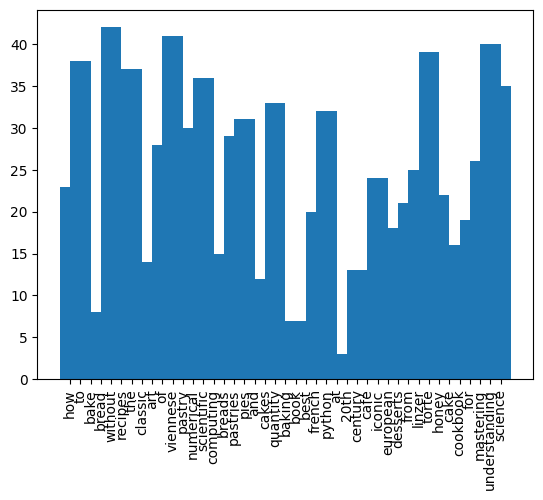

In [22]:
_ = plt.bar(range(len(vectorizer.vocabulary_)), list(vectorizer.vocabulary_.values()), align='center', width=2)
_ = plt.xticks(range(len(vectorizer.vocabulary_)), list(vectorizer.vocabulary_.keys()),rotation='vertical')

<BarContainer object of 43 artists>

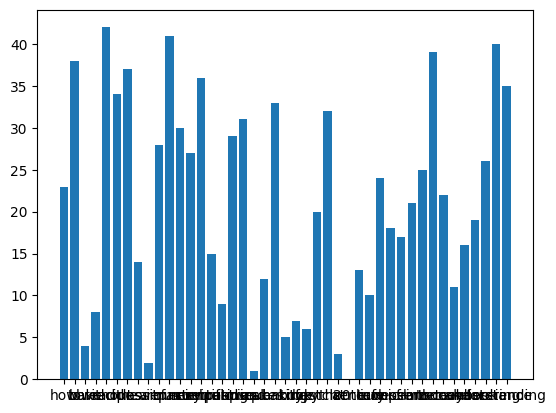

In [23]:
plt.bar(*zip(*vectorizer.vocabulary_.items()))

In [24]:
L = []
for i in range(len(documents)):
    L.append(remove_stopwords(documents[i]))
print('\n List of documents without stop words\n ', L)

L_final = []
for i in range(len(documents)):
    L_final.append(stem_text(L[i]))
print('\n List of documents after stemming \n ', L_final)


 List of documents without stop words
  ['How Bake Bread Without Recipes', 'The Classic Art Viennese Pastry', 'Numerical Recipes: The Art Scientific Computing', 'Breads, Pastries, Pies Cakes: Quantity Baking Recipes', 'Pastry: A Book Best French Recipes', 'Numerical Python', 'Baking 20th Century Cafe: Iconic European Desserts Linzer Torte Honey Cake', 'Python Cookbook: Recipes Mastering Python', 'Understanding Baking: The Art Science Baking']

 List of documents after stemming 
  ['how bake bread without recip', 'the classic art viennes pastri', 'numer recipes: the art scientif comput', 'breads, pastries, pi cakes: quantiti bake recip', 'pastry: a book best french recip', 'numer python', 'bake 20th centuri cafe: icon european dessert linzer tort honei cake', 'python cookbook: recip master python', 'understand baking: the art scienc bake']


In [25]:
Y = vectorizer.fit_transform(L_final).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))

A = Y.T
print(A.shape)

vectorizer.vocabulary_: {'how': 19, 'bake': 2, 'bread': 6, 'without': 38, 'recip': 30, 'the': 34, 'classic': 12, 'art': 1, 'viennes': 37, 'pastri': 24, 'numer': 23, 'recipes': 31, 'scientif': 33, 'comput': 13, 'breads': 7, 'pastries': 25, 'pi': 27, 'cakes': 10, 'quantiti': 29, 'pastry': 26, 'book': 5, 'best': 4, 'french': 17, 'python': 28, '20th': 0, 'centuri': 11, 'cafe': 8, 'icon': 20, 'european': 16, 'dessert': 15, 'linzer': 21, 'tort': 35, 'honei': 18, 'cake': 9, 'cookbook': 14, 'master': 22, 'understand': 36, 'baking': 3, 'scienc': 32}
(39, 9)


In [33]:
 #query vector
query1text = ['Pies and Cakes Baking']
query_stem = query1text[0]#stem_text(query1text[0])
query1 = [query_stem]
query1 = vectorizer.transform(query1).toarray()

In [34]:
(m,n)=A.shape
print(A.shape)
eu=np.array(np.zeros(n))
for i in range(n):
    eu[i] = np.linalg.norm(A[:,i],2)

An= np.dot(A,np.diag(1/eu))
print(An.shape)

(39, 9)
(39, 9)


The search for relevant documents is carried out by computing the cosines of the angles between the query vector and the document vectors. A document is returned as relevant only if the cosine of the angle it makes with the query vector is greater than some threshold or cutoff value.

Let us compute the cosine similarity between every vector of An and  ``query1``

In [35]:
np.dot(An.T,query1.T)/np.linalg.norm(query1, 2)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.26726124],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.28867513]])

In [36]:
ei=np.array(np.zeros(n))
for i in range(n):
    ei[i] = np.linalg.norm(A[:,i],np.Inf)

Ai= np.dot(A,np.diag(1/ei))

In [37]:
np.dot(Ai.T,query1.T)/np.linalg.norm(query1, 2)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.70710678],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.70710678]])

In [38]:
e1=np.array(np.zeros(n))
for i in range(n):
    e1[i] = np.linalg.norm(A[:,i],1)

A1= np.dot(A,np.diag(1/e1))

In [39]:
np.dot(A1.T,query1.T)/np.linalg.norm(query1, 2)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.10101525],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.11785113]])